In [1]:
# Core numerical and data manipulation libraries
import numpy as np                     # For numerical operations and array handling
import pandas as pd                   # For working with dataframes and structured data

# Visualization libraries
import seaborn as sns                 # For creating advanced visualizations and statistical plots
import matplotlib.pyplot as plt       # For basic plotting and visual customization

# Ignore warnings for cleaner output (optional, use with care)
import warnings                                      # To suppress warnings during experimentation

In [2]:
warnings.filterwarnings("ignore")  # Suppress all warnings for cleaner output

In [3]:
# Load the HR dataset and display a random sample row to inspect the data
data = pd.read_csv("HR_comma_sep.csv")
data.sample(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
400,0.91,1.00,5,251,6,0,1,0,sales,low
5214,0.57,0.53,5,216,2,1,0,0,sales,medium
14856,0.40,0.54,2,141,3,0,1,0,technical,medium
4650,0.82,0.69,5,219,3,0,0,0,IT,medium
12184,0.36,0.55,2,141,3,0,1,0,hr,medium


In [4]:
# Display summary statistics for numerical features (count, mean, std dev, min/max, quartiles)
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
# Check data types, non-null counts, and memory usage for each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
# Count the number of duplicated rows in the dataset
data.duplicated().sum()

3008

In [7]:
# Count of work accidents among employees who left the company (left == 1)
data[data["left"] == 1]["Work_accident"].value_counts()

Work_accident
0    3402
1     169
Name: count, dtype: int64

In [8]:
# Count of work accidents among employees who stayed at the company (left == 0)
data[data["left"] == 0]["Work_accident"].value_counts()

Work_accident
0    9428
1    2000
Name: count, dtype: int64

In [9]:
# Subset of employees who left the company (attrition cases)
left_company = data[data["left"] == 1]
left_company

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


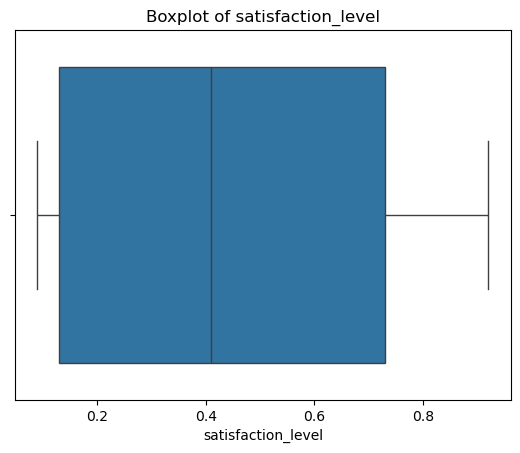

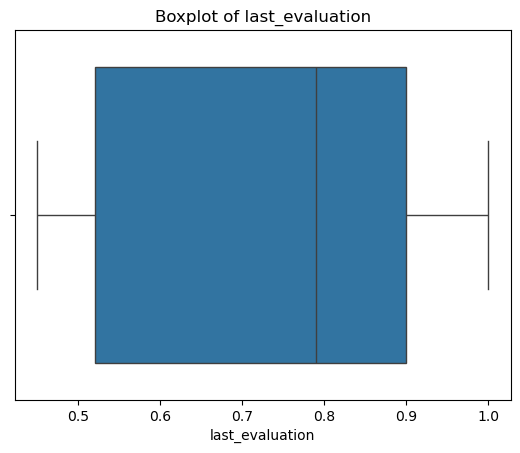

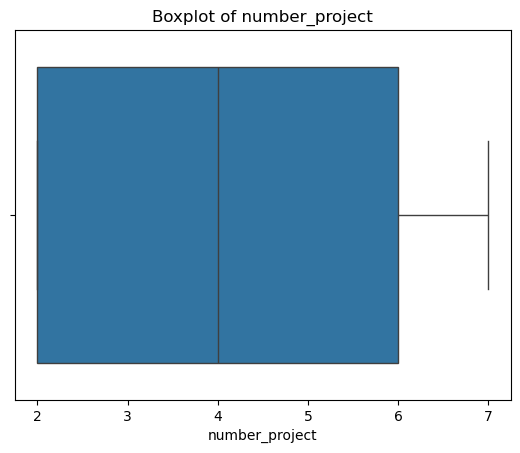

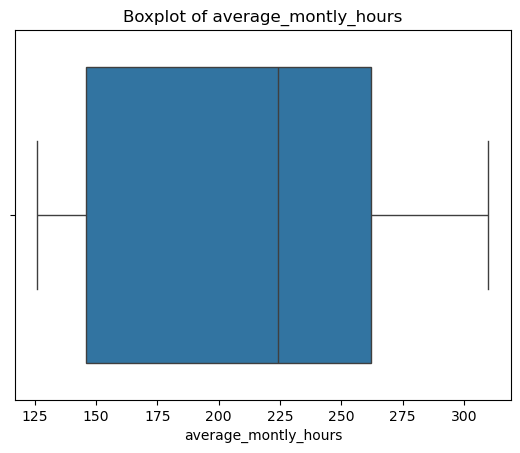

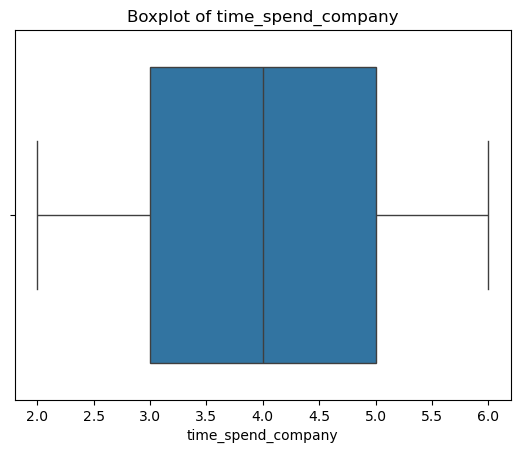

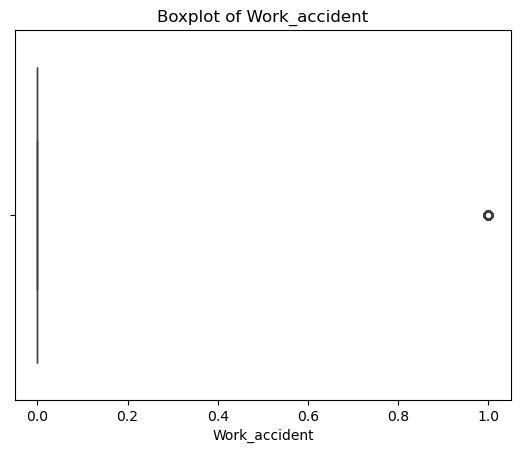

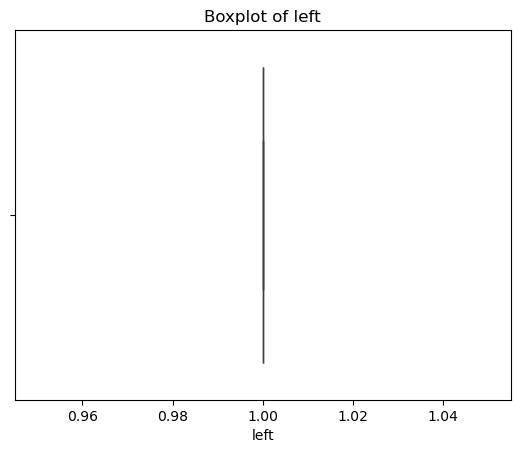

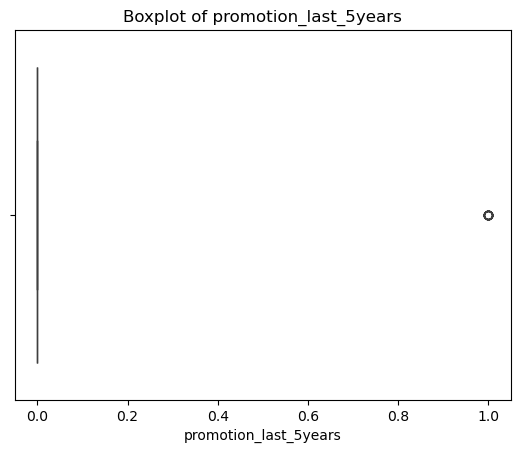

In [10]:
# Visualizing Boxplot of numerical features to detect outiler in the left 
for col in data.select_dtypes(include=['number']).columns:
    sns.boxplot(x=left_company[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


In [11]:
# Subset of employees who stayed at the company (non-attrition cases)
stay = data[data["left"] == 0]
stay

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
2000,0.58,0.74,4,215,3,0,0,0,sales,low
2001,0.82,0.67,2,202,3,0,0,0,sales,low
2002,0.45,0.69,5,193,3,0,0,0,sales,low
2003,0.78,0.82,5,247,3,0,0,0,sales,low
2004,0.49,0.60,3,214,2,0,0,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14206,0.90,0.55,3,259,10,1,0,1,management,high
14207,0.74,0.95,5,266,10,0,0,1,management,high
14208,0.85,0.54,3,185,10,0,0,1,management,high
14209,0.33,0.65,3,172,10,0,0,1,marketing,high


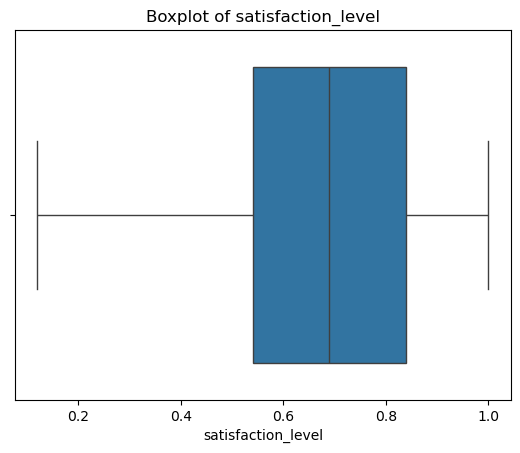

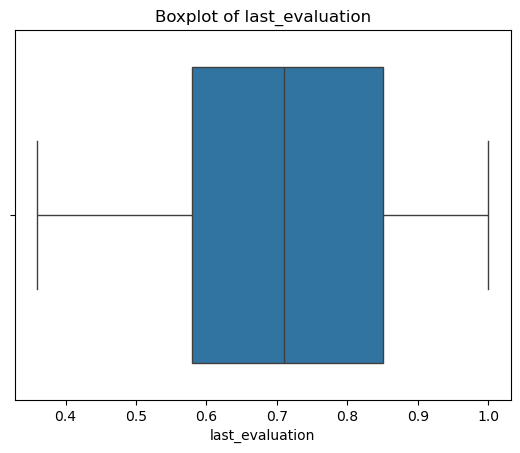

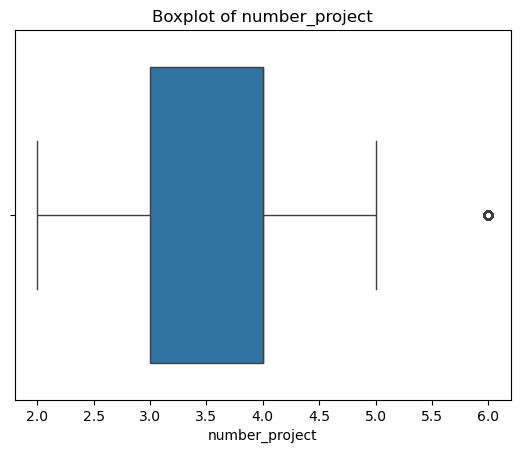

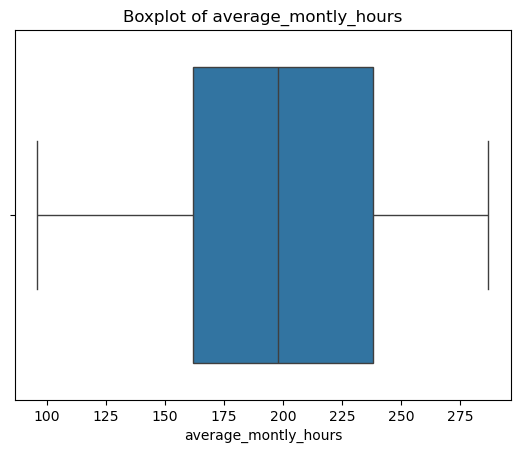

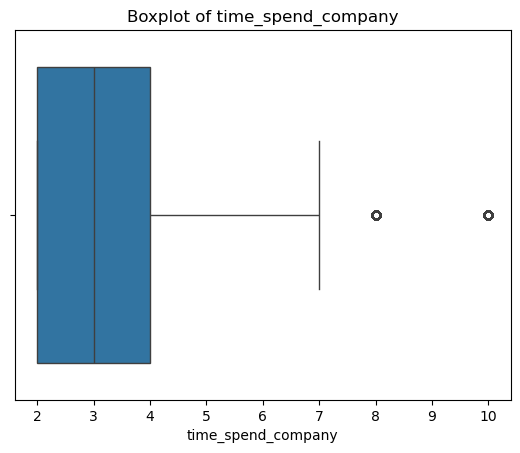

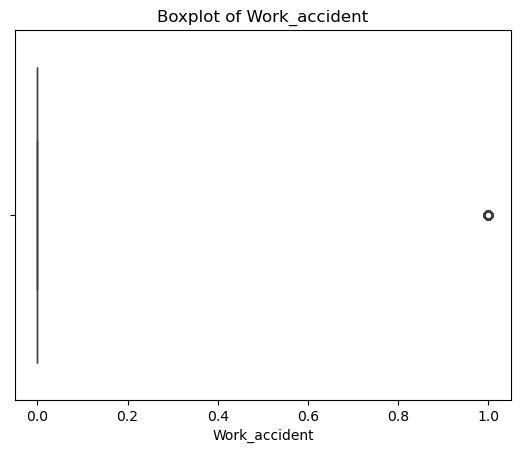

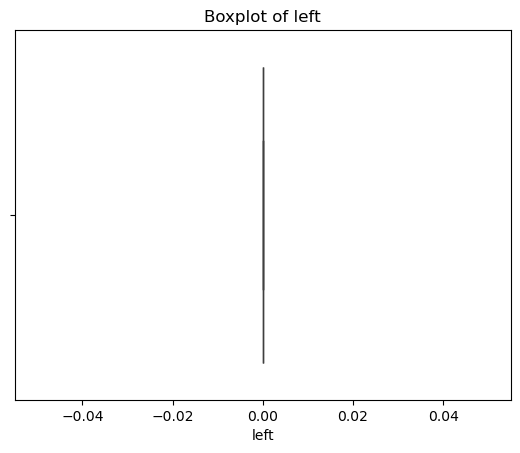

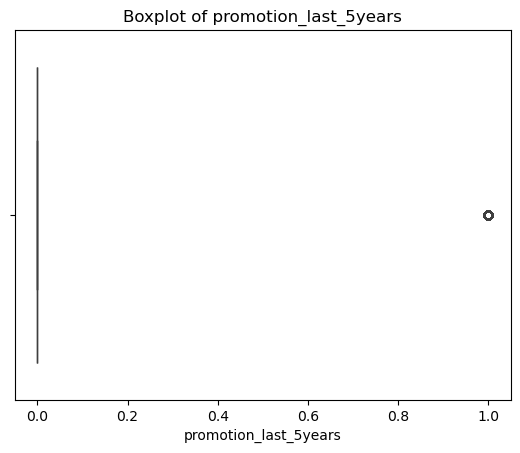

In [12]:
# Visualizing Boxplot of numerical features to detect outiler in the stay 
for col in data.select_dtypes(include=['number']).columns:
    sns.boxplot(x=stay[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

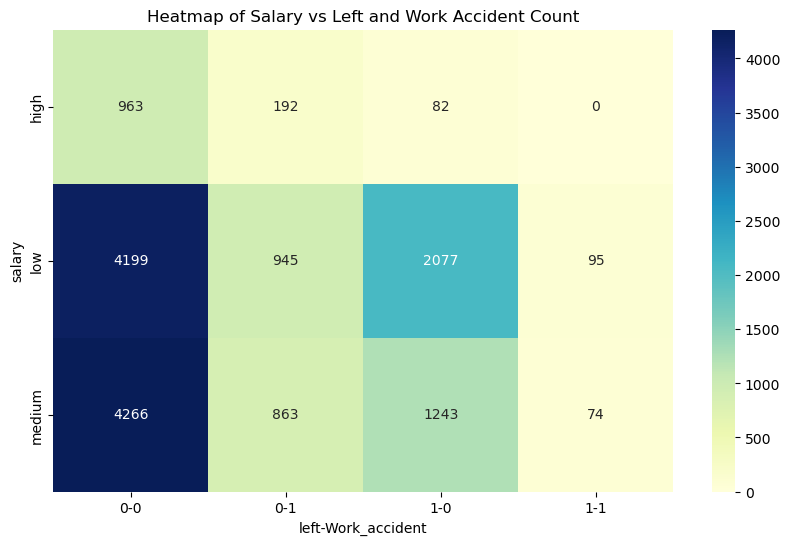

In [13]:

# Example of your grouped data
gr = data.groupby(["left"])[["salary","Work_accident"]].value_counts()

# Convert it into DataFrame
gr = gr.reset_index(name='count')

# Pivot the data into matrix format suitable for heatmap
pivot_table = gr.pivot_table(index="salary", columns=["left", "Work_accident"], values="count", fill_value=0)

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu",fmt="g")
plt.title("Heatmap of Salary vs Left and Work Accident Count")
plt.show()


In [14]:
# Counting occurrences of (salary, time_spend_company) combinations across attrition status ('left')
time_spend = data.groupby(["left"])[["salary","time_spend_company"]].value_counts()
time_spend

left  salary  time_spend_company
0     low     3                     2219
      medium  3                     2164
      low     2                     1505
      medium  2                     1383
      low     4                      759
      medium  4                      751
      high    3                      474
      low     5                      311
      high    2                      303
      medium  5                      283
              6                      256
      low     6                      198
      high    4                      157
      medium  7                      114
              10                      94
              8                       84
      high    10                      64
      low     8                       60
              10                      56
      high    6                       55
              5                       46
              7                       38
      low     7                       36
      high    8         

<Axes: xlabel='time_spend_company', ylabel='left-salary'>

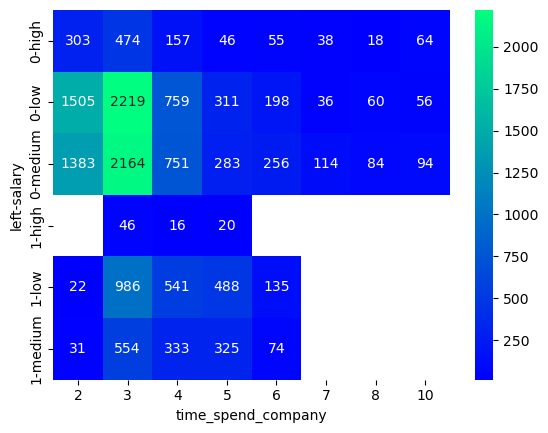

In [15]:
# Unstacking a multi-index Series (e.g., time_spend) to form a DataFrame for heatmap visualization.
# Annotated heatmap displays values, with 'winter' colormap for a cool-tone gradient.
visual1 = time_spend.unstack()
sns.heatmap(visual1,annot=True,fmt="g",cmap = "winter")

In [16]:
# Counting frequency of average monthly hours grouped by attrition status ('left')
data.groupby(["left"])[["average_montly_hours"]].value_counts()

left  average_montly_hours
0     224                     102
      173                      96
      149                      94
      162                      94
      167                      94
                             ... 
1     178                       1
      188                       1
      196                       1
      203                       1
      204                       1
Name: count, Length: 356, dtype: int64

<Axes: xlabel='average_montly_hours', ylabel='left'>

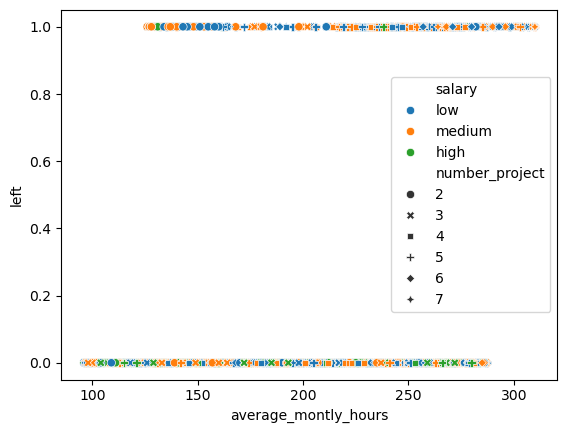

In [17]:
# Analyzing attrition patterns based on average monthly hours.
# Hue distinguishes salary levels, style encodes project count,
# and y-axis captures whether an employee left (1) or stayed (0).
sns.scatterplot(x = data["average_montly_hours"],y = data["left"],hue = data["salary"],style=data["number_project"])

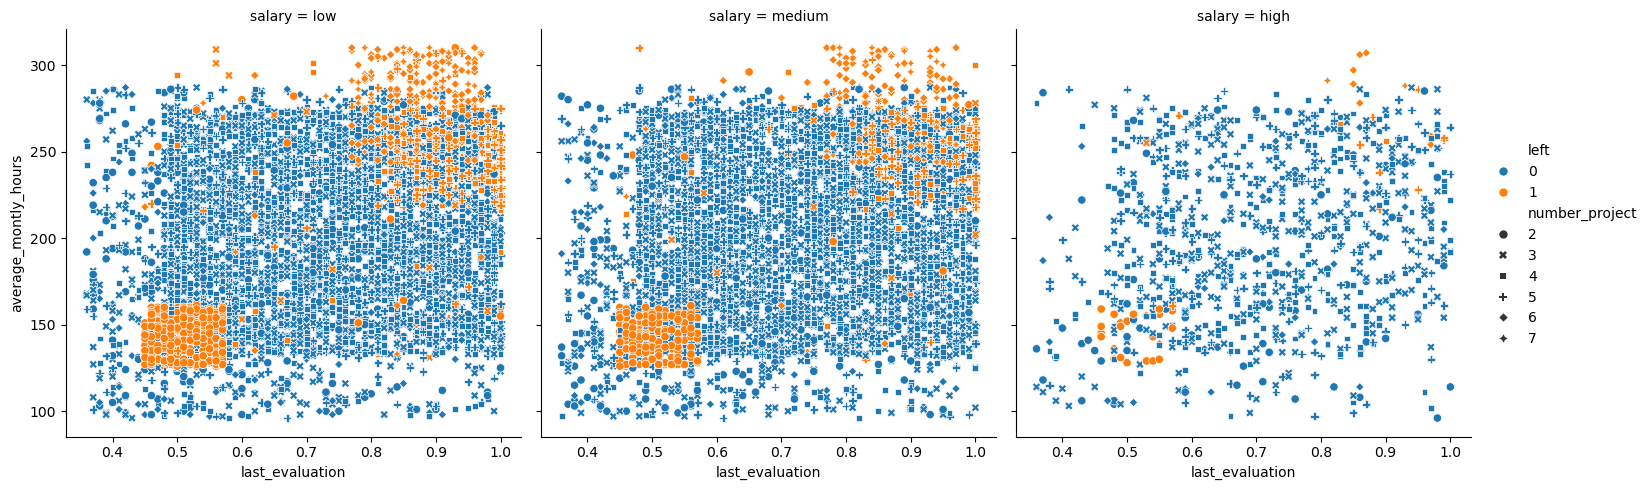

In [18]:
# Exploring relationship between evaluation score and monthly working hours,
# segmented by attrition status, project load, and salary level
sns.relplot(data = data,kind = "scatter",x = "last_evaluation", y = "average_montly_hours",hue = "left",style="number_project",col_wrap=3,col= "salary")

<Axes: ylabel='time_spend_company'>

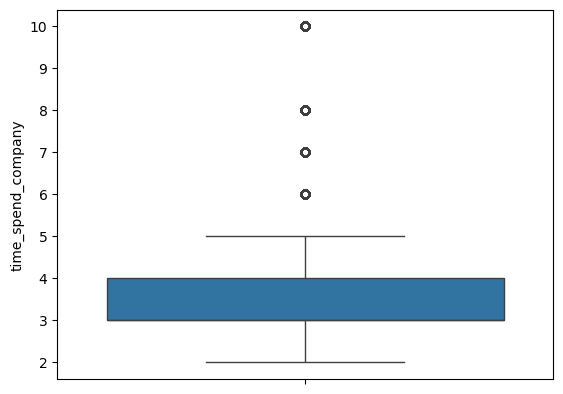

In [19]:
sns.boxplot(data["time_spend_company"]) 

<Axes: xlabel='time_spend_company', ylabel='Density'>

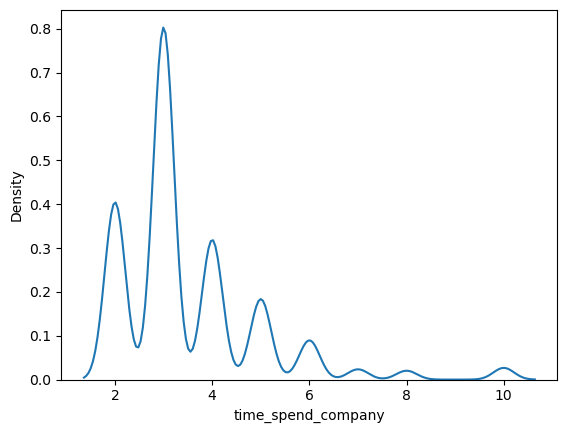

In [20]:
sns.distplot(data["time_spend_company"],hist = False)

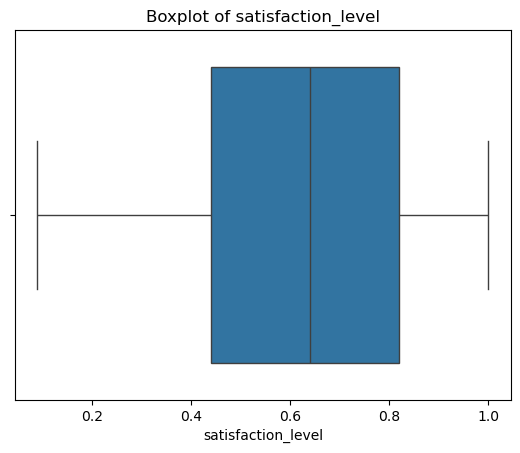

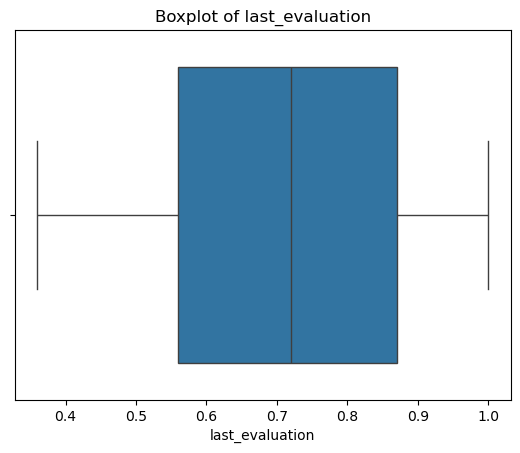

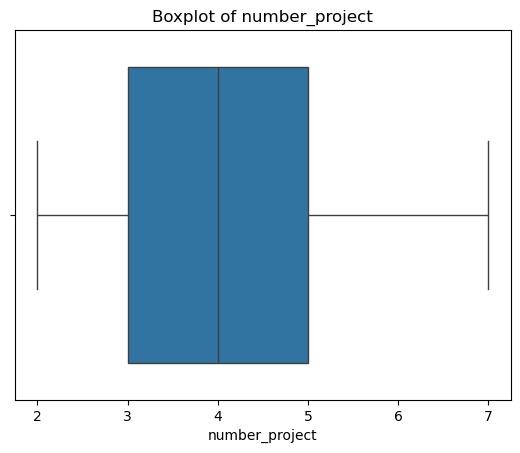

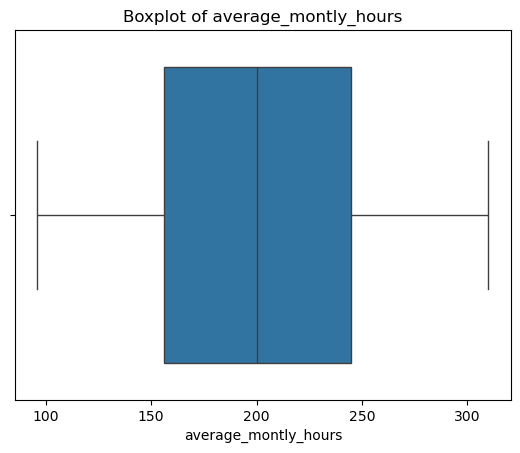

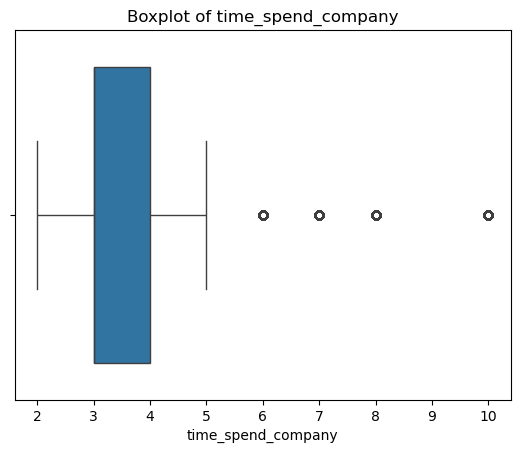

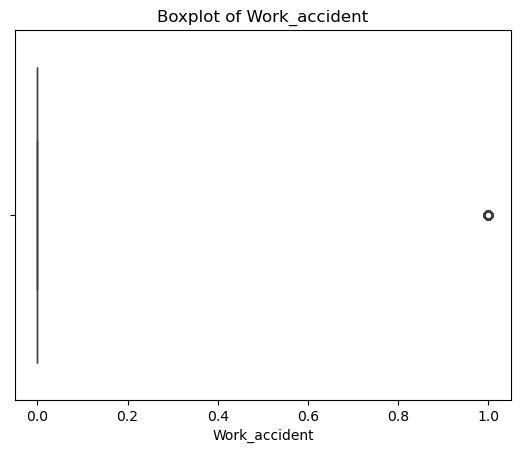

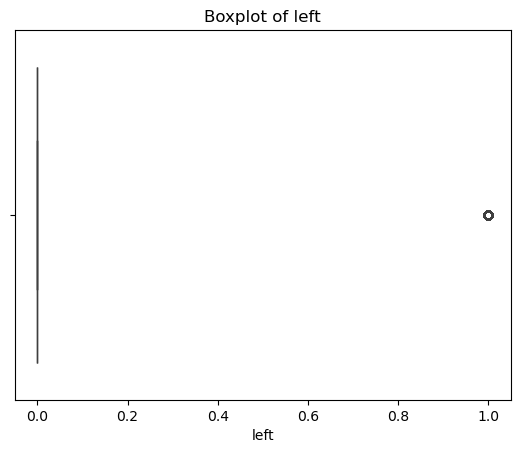

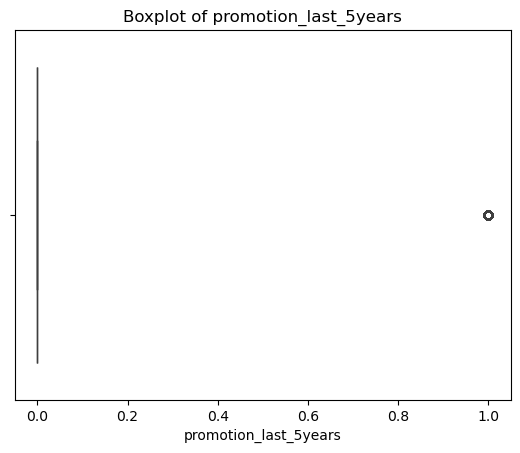

In [21]:
# Visualizing Boxplot of numerical features to detect outiler 
for col in data.select_dtypes(include=['number']).columns:
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


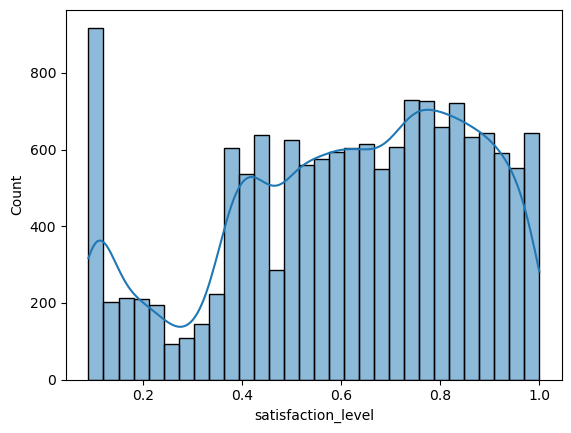

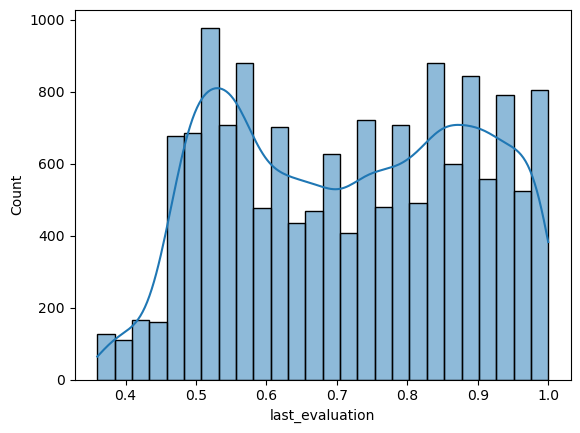

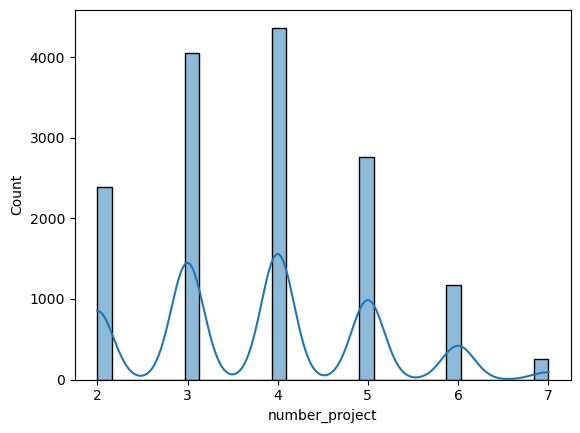

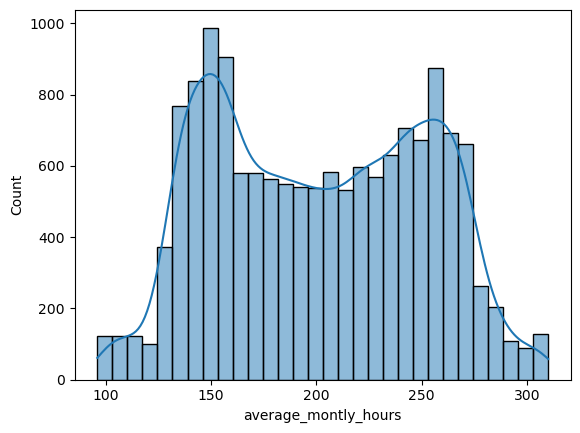

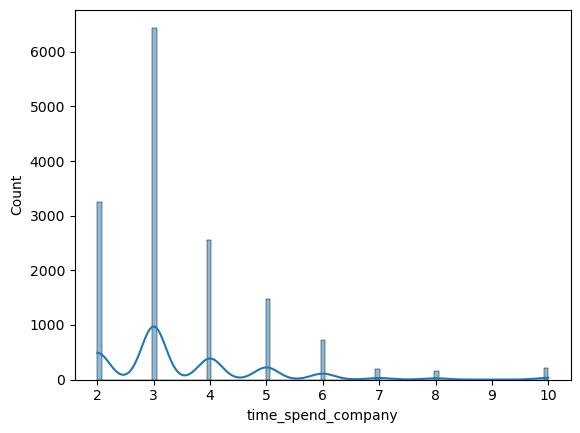

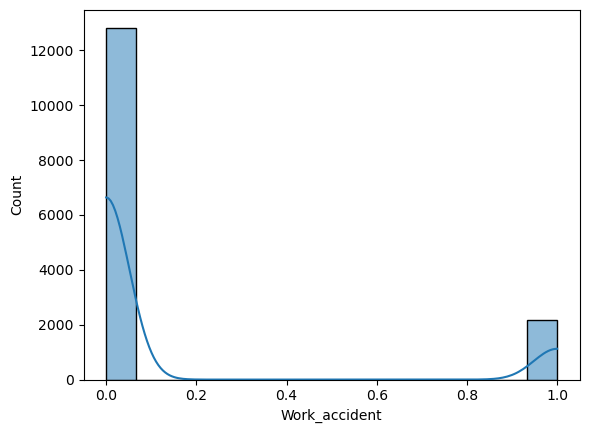

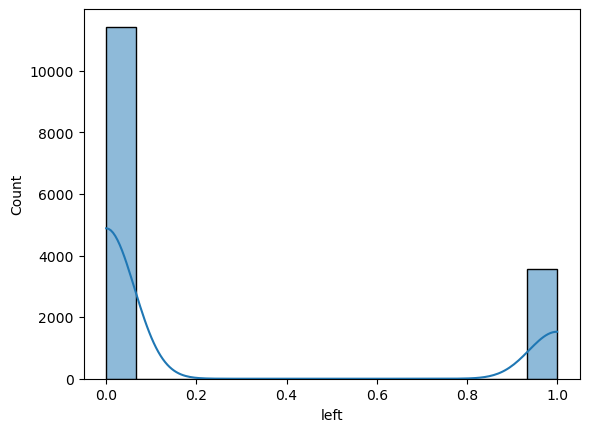

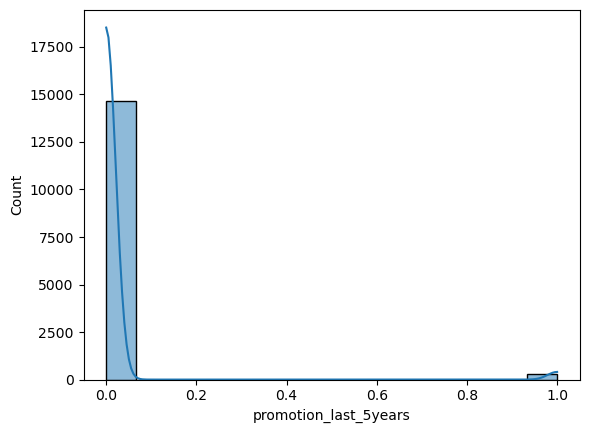

In [22]:
# Visualizing distributions of numerical features to detect skewness
for col in data.select_dtypes(include=['number']).columns:
    sns.histplot(data[col], kde=True)  
    plt.show()

In [23]:
# Computing the Pearson correlation matrix for all numerical features
# Helps identify linear relationships between variables for feature selection or engineering
corr_matrix = data.select_dtypes(include='number').corr()

In [24]:
corr_matrix

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


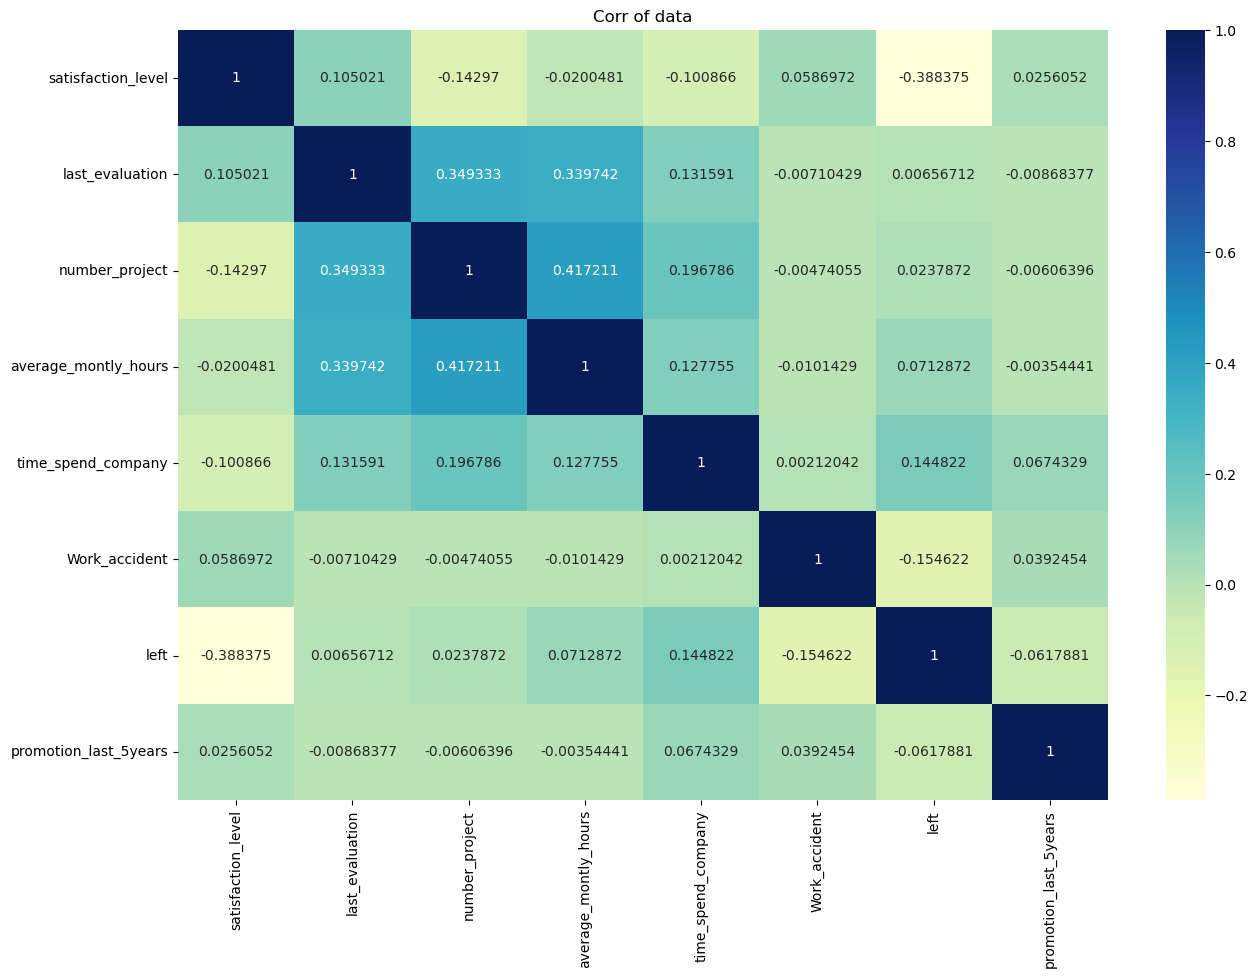

In [25]:
# Plot heatmap
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu",fmt="g")
plt.title("Corr of data")
plt.show()


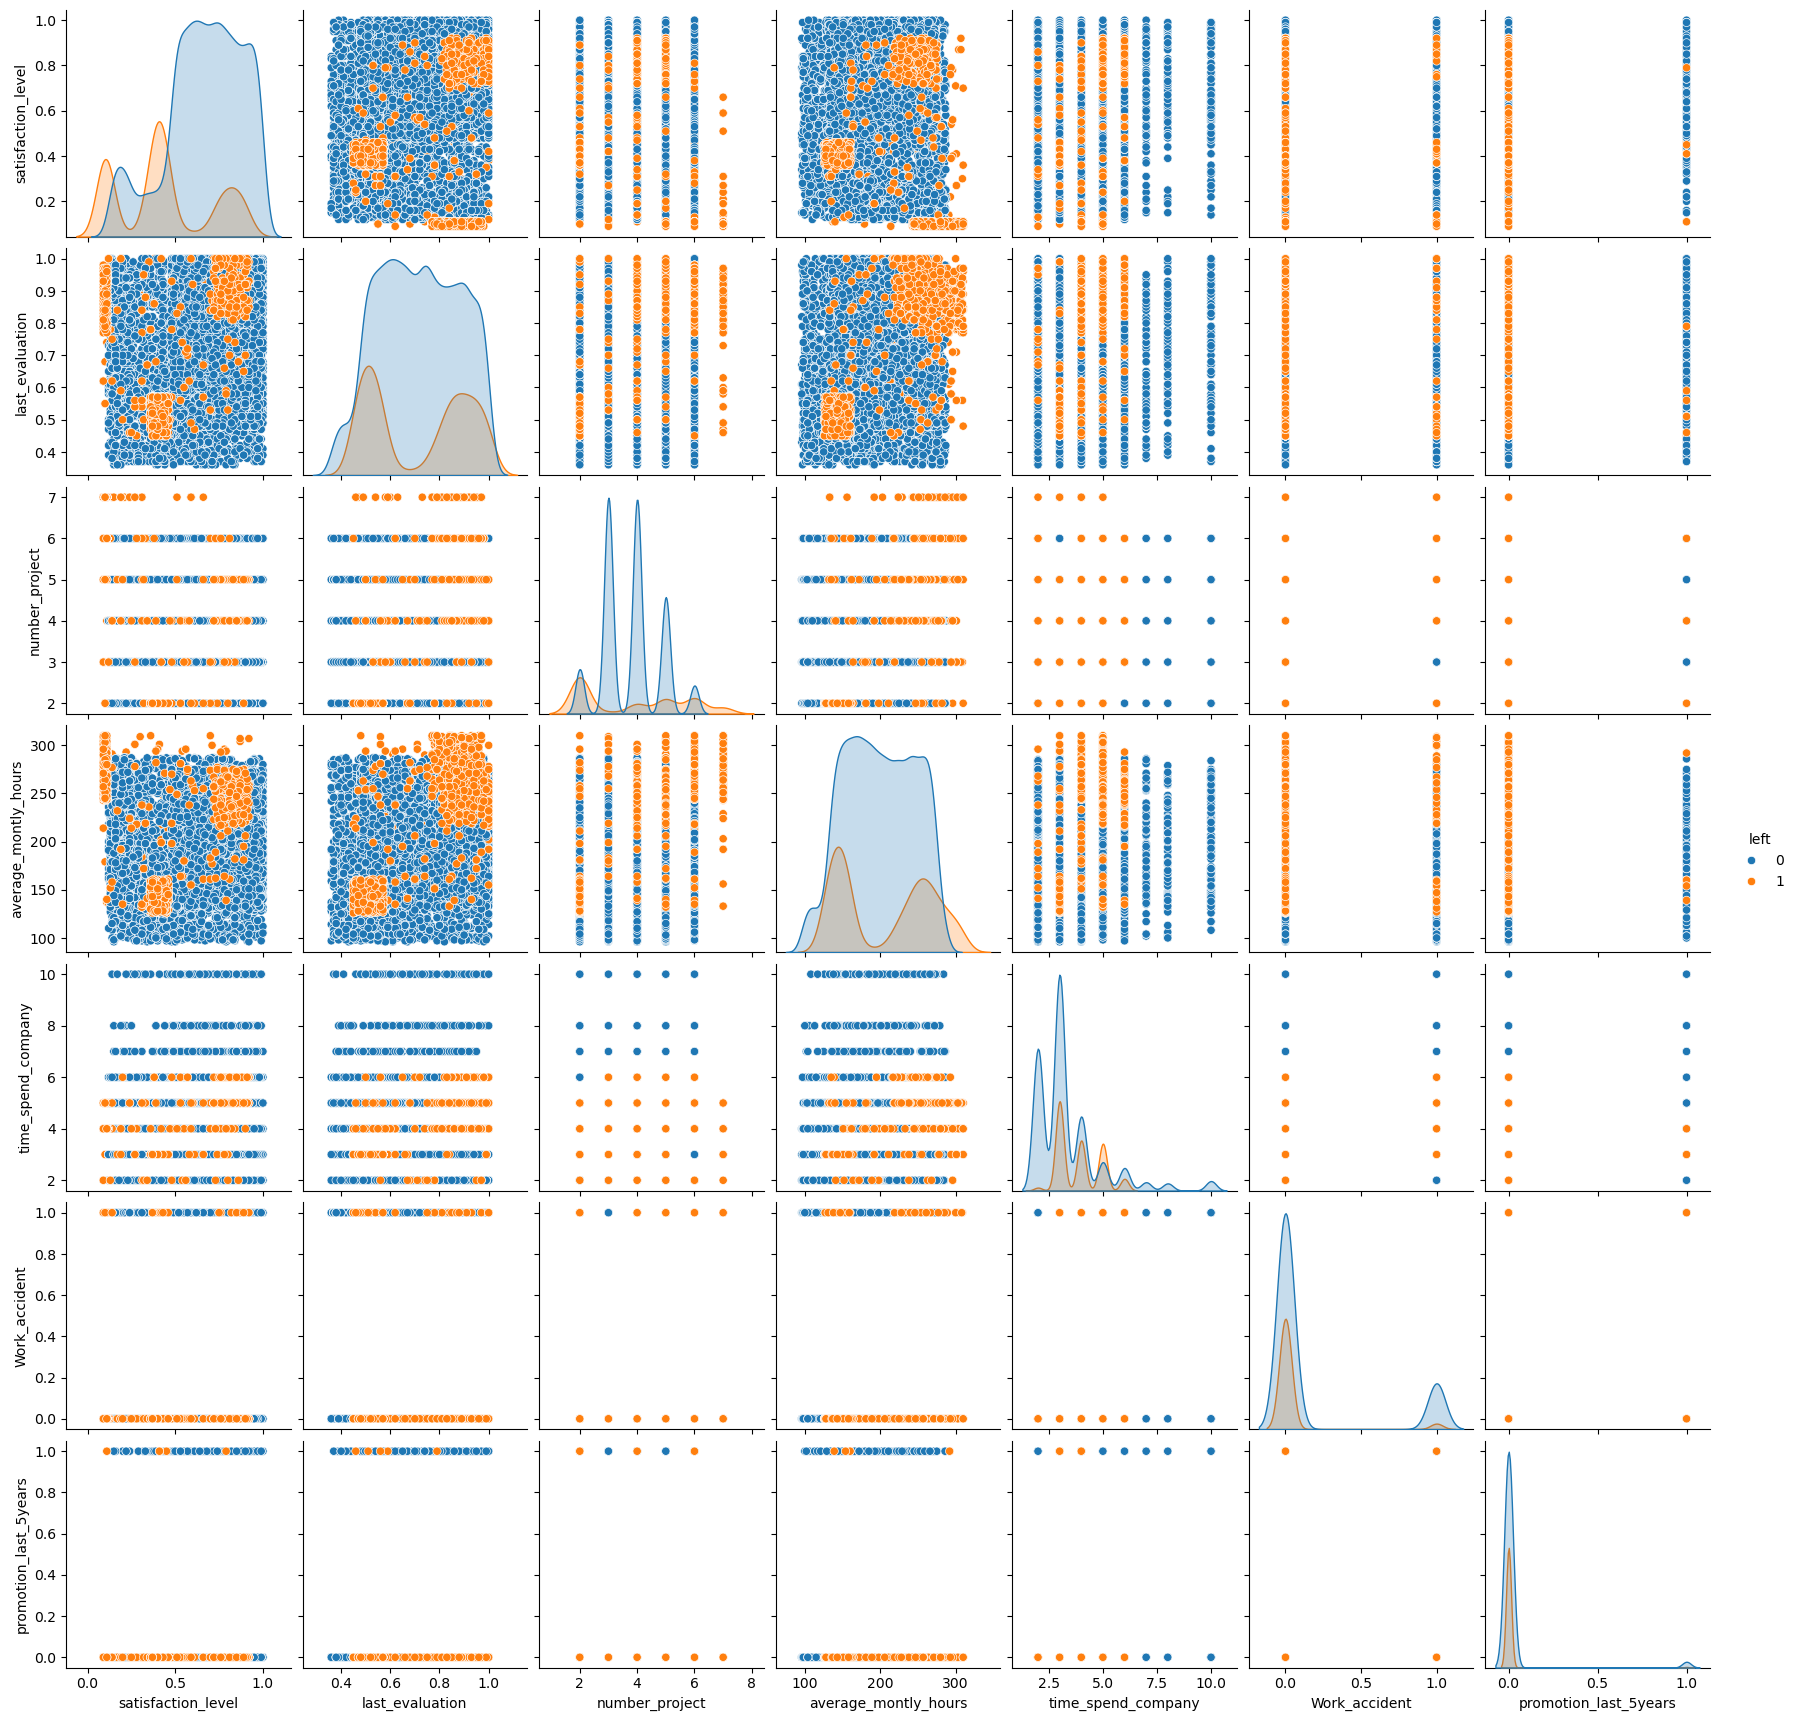

In [26]:
# ploting the pairplot
sns.pairplot(data,hue = "left")

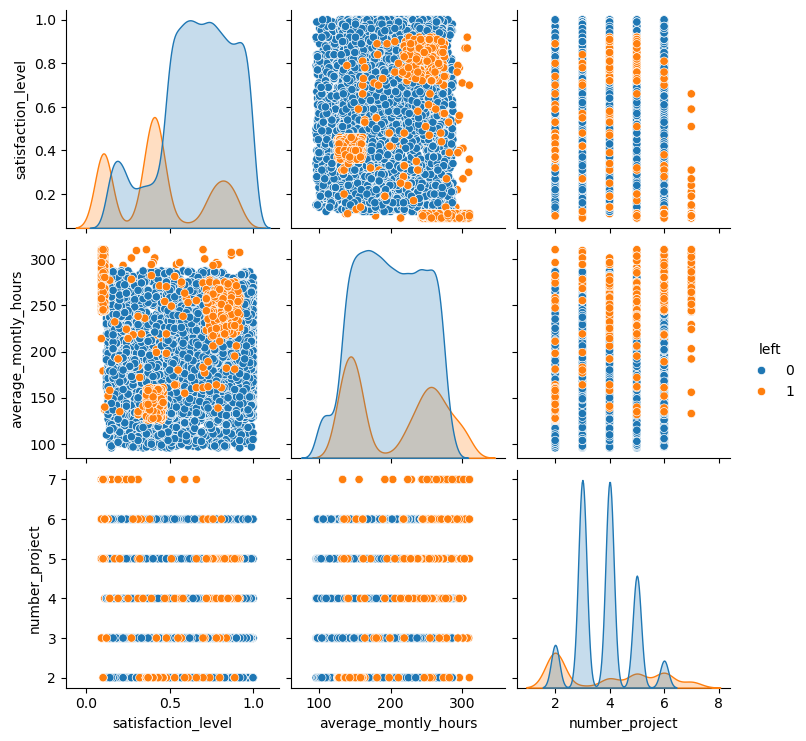

In [27]:
# ploting the pairplot in the import features
important_features = ['satisfaction_level', 'average_montly_hours', 'number_project', 'left']
sns.pairplot(data[important_features], hue='left', diag_kind='kde')
